# Comparing COMPAS-1x and COMPAS-2x
This notebook compares the COMPAS-1 and COMPAS-2 datasets. It is used to highlight the major differences between both datasets.

COMPAS-1 is comprehend solely of PAHs made of cata-condensed benzene rings, while COMPAS-2 contains hPAHs made of cata-condensed benzene and 9 heterocyclic and cyclobutadiene. The heterocyclic rings are made of 5 and 6-membered rings containing one or two heteroatoms (N, O, S, and B).

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path

# Reload imported libraries automatically
%load_ext autoreload
%autoreload 2

In [2]:
# Import data
df_compas_1 = pd.read_csv('.temp/data/compas-1x.csv', index_col=0)
df_compas_2 = pd.read_csv(".temp/data/compas-2x.csv", index_col=0).query('charge == 0').copy()

In [3]:
# Print shape of data
print("COMPAS-1:", df_compas_1.shape)
print("COMPAS-2:", df_compas_2.shape)

# Print column names
print("COMPAS-2 not in COMPAS-1:", set(df_compas_2.columns) - set(df_compas_1.columns))

COMPAS-1: (33944, 33)
COMPAS-2: (524392, 50)
COMPAS-2 not in COMPAS-1: {'lala', 'zero_point_energy', 'borole', 'dhdiborinine', 'pyrrole', 'aepe', 'thiophene', 'ae', 'types', 'pyridine', 'cyclobutadiene', '14diborinine', 'borinine', 'stereo', 'pyrazine', 'benzene', 'furan'}


# Compare COMPAS-1 and COMPAS-2 results for the same molecule

Some molecules from COMPAS-1 are also part of the COMPAS-2 dataset. It is important to note that these molecules emerge as part of the combinatorial enumeration process of COMPAS-2 and therefore follow the same statistical distribution. We can compare the results for these molecules.

In [30]:
from func import calc_atomisation_energy

df_compas_1['dataset'] = 'compas-1'
df_compas_2['dataset'] = 'compas-2'
df = pd.concat([df_compas_1, df_compas_2], axis=0)
df = df.sort_values('smiles')

inchi_common = set(df_compas_1.inchi).intersection(set(df_compas_2.inchi))

df['ae'] = calc_atomisation_energy(df,energy_col='energy',per_electron=True)
df['ae_corr'] = calc_atomisation_energy(df,energy_col='energy_corr',per_electron=True)
benchmark = df.query('inchi in @inchi_common')

In [58]:
# electronic properties
props = ['homo','lumo','gap','aip','aea',
         'ae'
         ]
props_corr = ['homo_corr','lumo_corr','gap_corr','aip_corr','aea_corr','ae_corr']
# group by
hue_by = ['rings', 'aromatic_rings', 'atoms', 'heteroatoms', 'heterocycles',
       'branch', 'cyclobutadiene', 'pyrrole', 'borole', 'furan', 'thiophene',
       'dhdiborinine', '14diborinine', 'pyrazine', 'pyridine', 'borinine',
       'benzene', 'h', 'c', 'b', 's', 'o', 'n']

In [32]:
from colors import cmap, heterocycles_colors
from matplotlib import pyplot as plt
import seaborn as sns

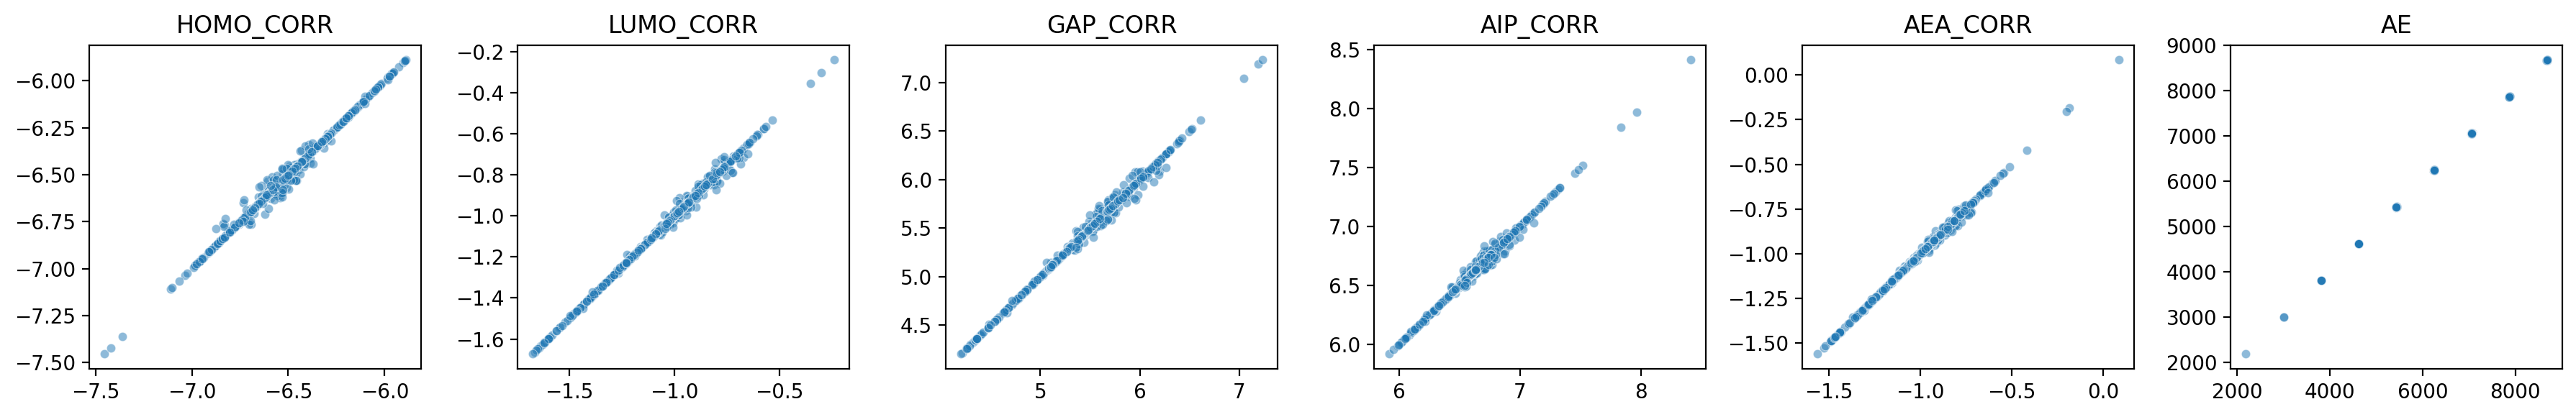

In [64]:
n_rows = 1
n_cols = int(np.ceil(len(props) / n_rows))

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*3,n_rows*3), dpi=200)
# Plot AIPs for COMPAS-1 and COMPAS-2
for prop, ax in zip(props_corr, axs):
    sns.scatterplot(x=benchmark.query('dataset == "compas-1"')[prop].values,
                y=benchmark.query('dataset == "compas-2"')[prop].values,
                alpha=0.5, s=20, ax=ax)
    ax.set_title(prop.upper())
# plt.xlabel('COMPAS-1')
# plt.ylabel('COMPAS-2')
plt.tight_layout()

# Distribution of the properties

The following section discusse the distribution of the properties in both datasets. The properties are the following: `HOMO, LUMO, GAP, AIP, AEA, AE`

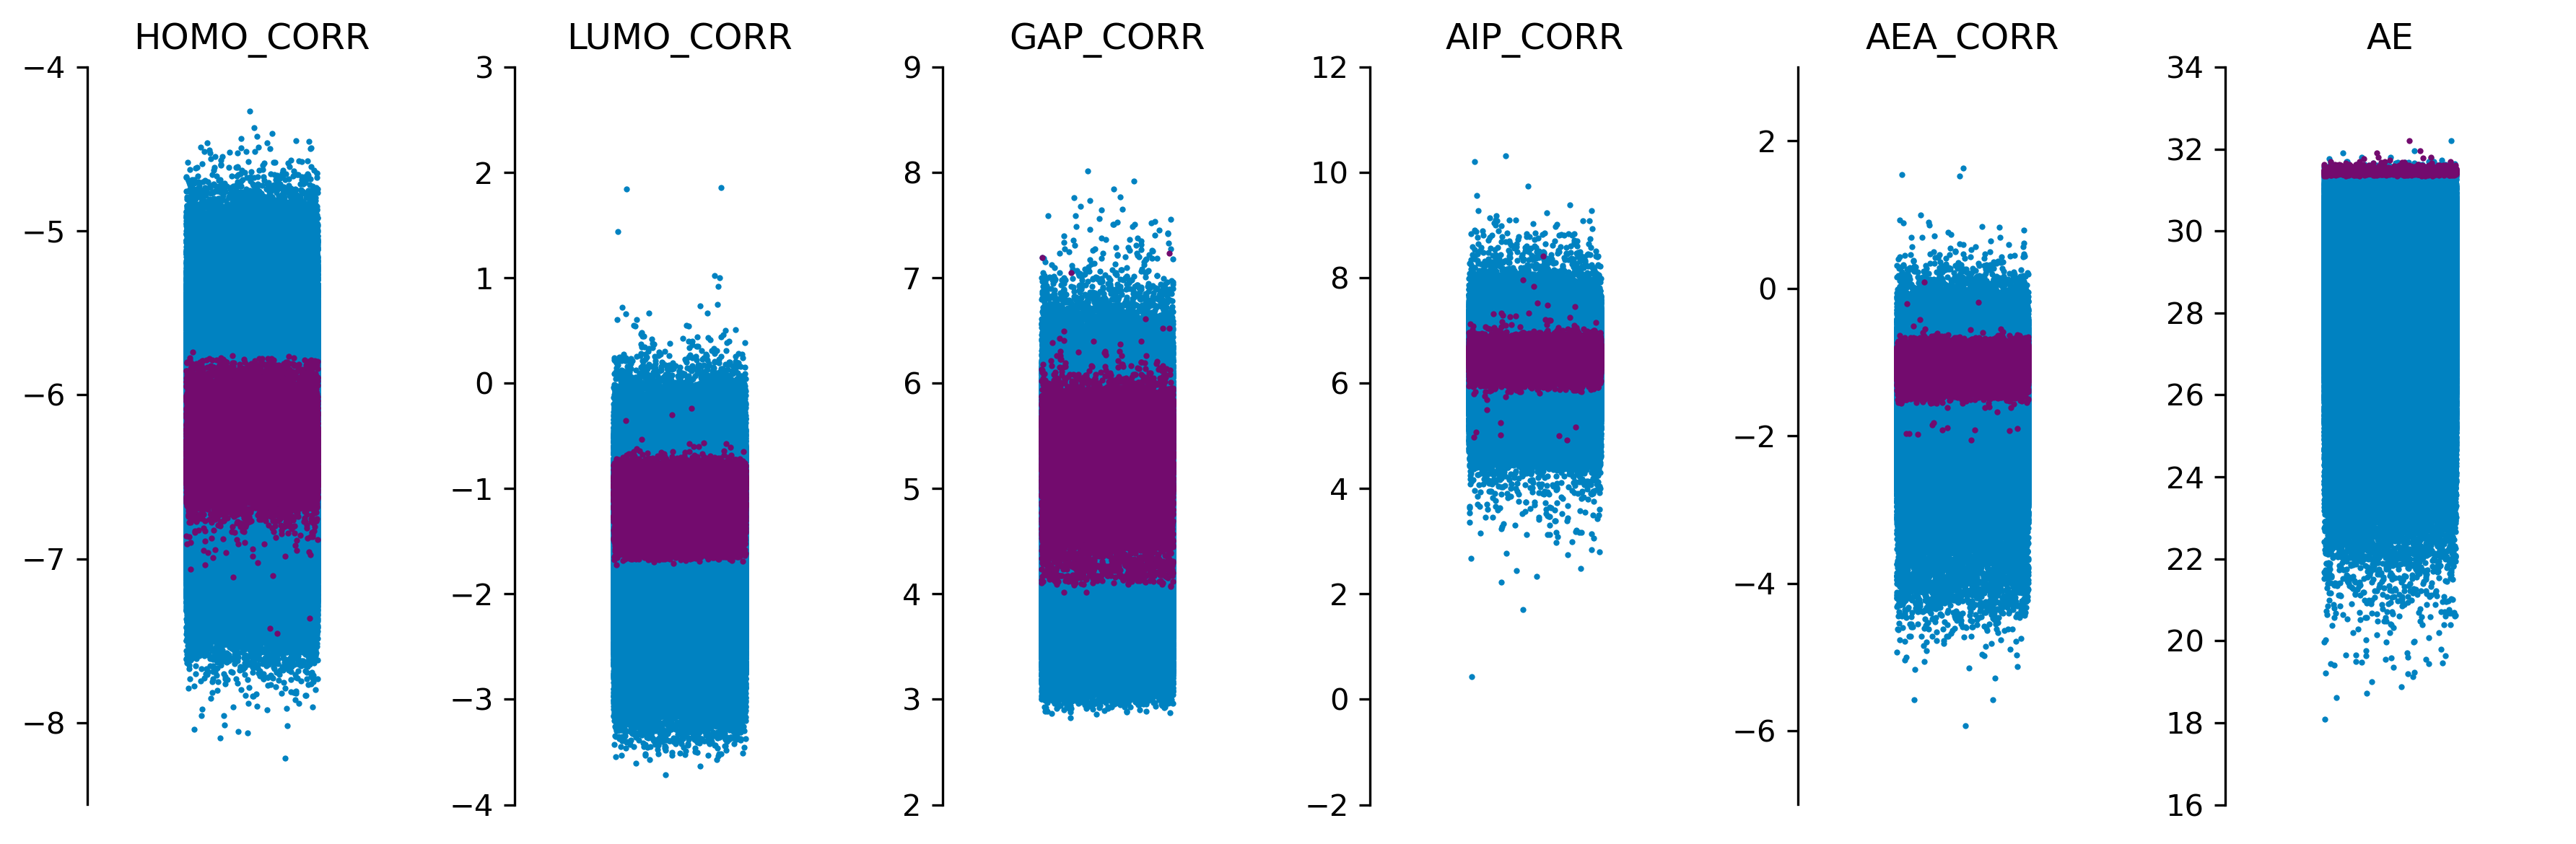

In [67]:
n_rows = 1
n_cols = int(np.ceil(len(props) / n_rows))

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*2,n_rows*4), dpi=300)
# Plot AIPs for COMPAS-1 and COMPAS-2
for prop, ax in zip(props_corr, axs):
    sns.stripplot(data=df.query('dataset == "compas-2"'), y=prop,
              s=2, jitter=0.2, ax=ax, color='#0082C1')
    sns.stripplot(data=df.query('dataset == "compas-1"'), y=prop,
              s=2, jitter=0.2, ax=ax, color='#730B6E')
    ax.set_title(prop.upper())
    # remove axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_ylim(bottom=ax.get_yticks()[0],
        top=ax.get_yticks()[-1]
    )
    if prop == 'gap':
        ax.set_ylim(bottom=-1,
        top=4
    )
    ax.locator_params(axis='y', integer=True)
    ax.set_ylabel('')
plt.tight_layout()

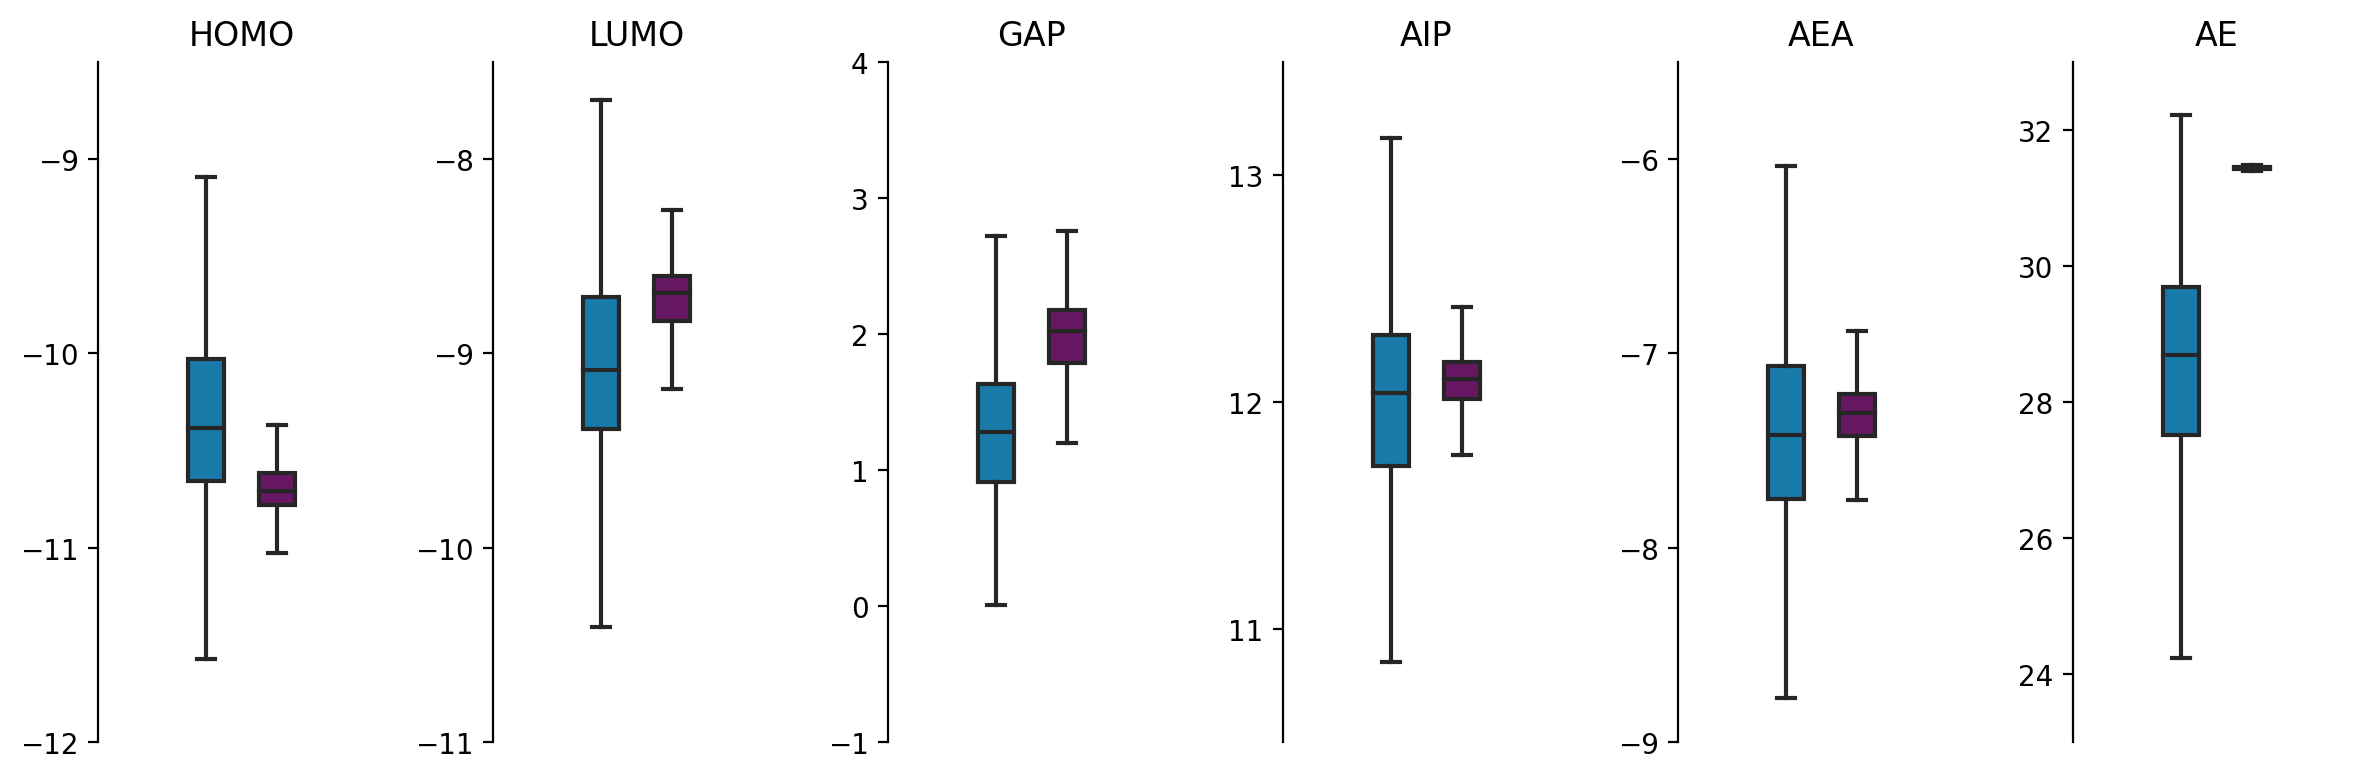

In [61]:
n_rows = 1
n_cols = int(np.ceil(len(props) / n_rows))

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*2,n_rows*4), dpi=200)
# Plot AIPs for COMPAS-1 and COMPAS-2
for prop, ax in zip(props, axs):
    sns.boxplot(data=df, 
            x='dataset', y=prop,
            showfliers=False,
            width=0.5,
            # colors from cmap
            palette=['#0082C1','#730B6E'],
            ax=ax)
    ax.set_title(prop.upper())
    # remove axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_ylim(
        bottom=ax.get_yticks()[0],
        top=ax.get_yticks()[-1]
    )
    ax.set_xlim(-1.5,2.5
    )
    if prop == 'gap':
        ax.set_ylim(bottom=-1,
        top=4
    )
    ax.locator_params(axis='y', integer=True)
    ax.set_ylabel('')
plt.tight_layout()

C:\Users\eduardo.mayo\AppData\Local\Temp\ipykernel_22628\2920333275.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\eduardo.mayo\AppData\Local\miniconda3\envs\chem_lab\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="b

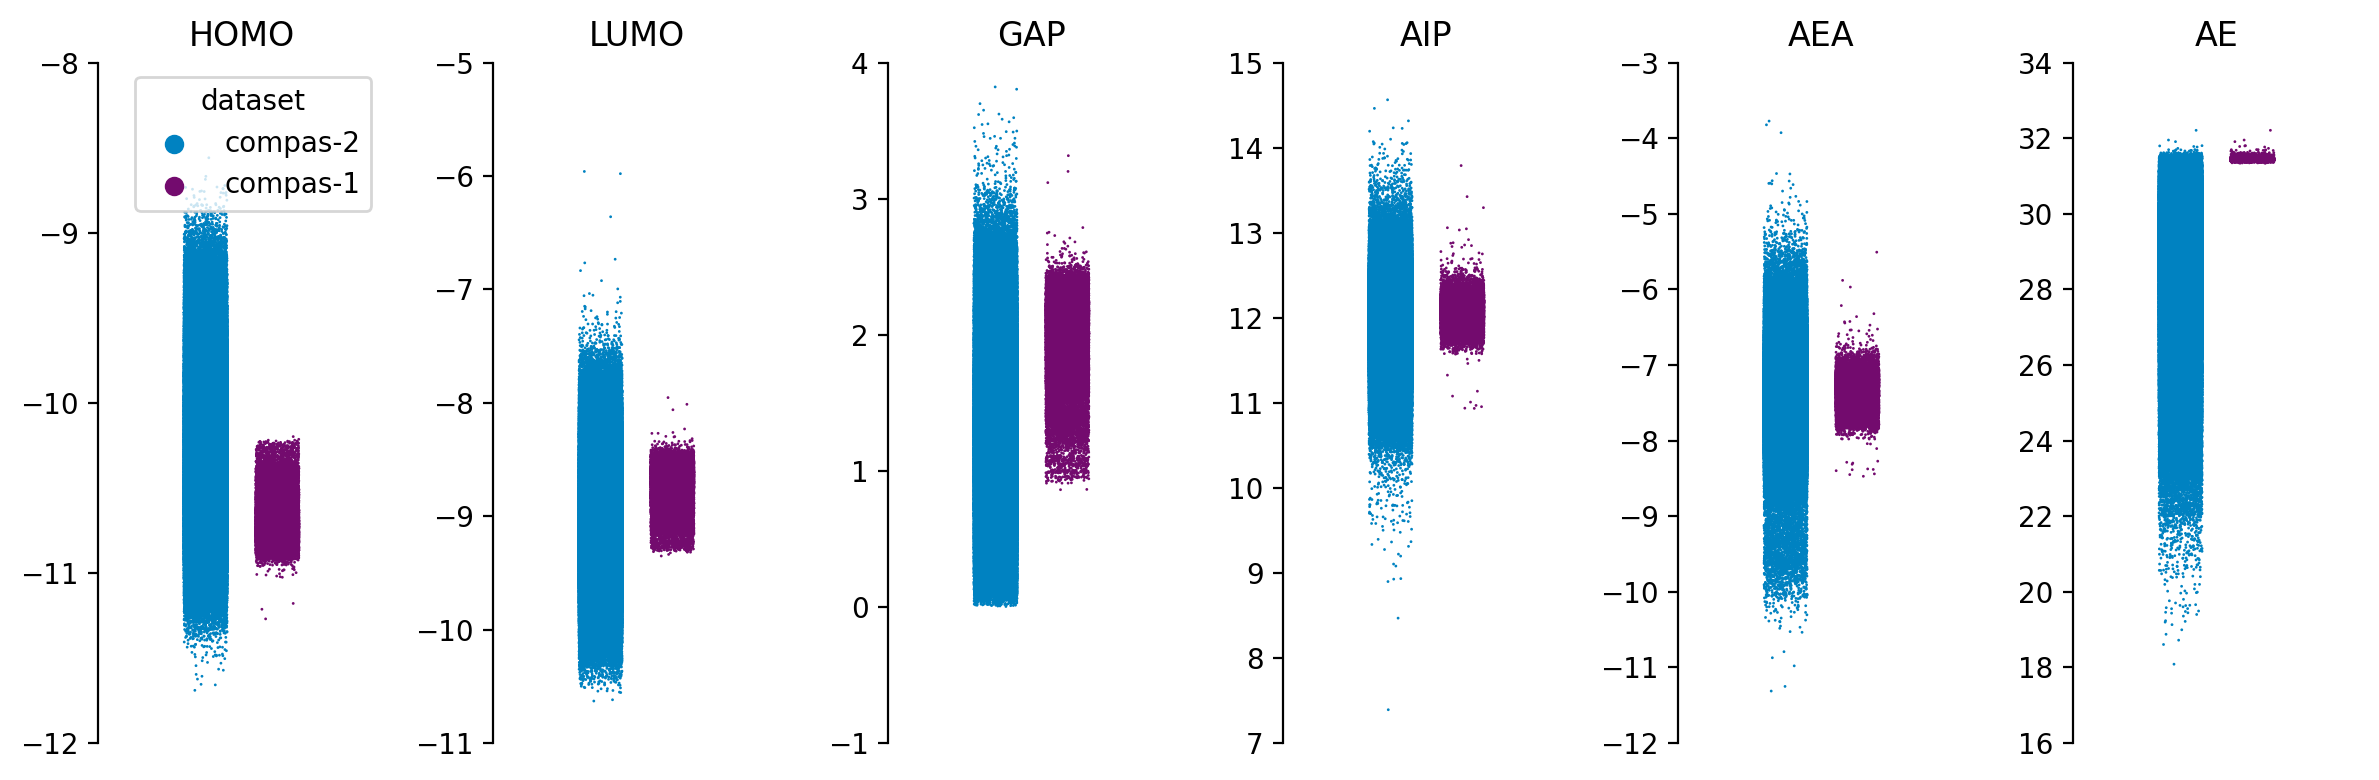

In [62]:
n_rows = 1
n_cols = int(np.ceil(len(props) / n_rows))

fig, axs = plt.subplots(n_rows,n_cols,figsize=(n_cols*2,n_rows*4), dpi=200)
hide_legend = False
# Plot AIPs for COMPAS-1 and COMPAS-2
for prop, ax in zip(props, axs):
    sns.stripplot(data=df, 
            x='dataset', y=prop,
            jitter=0.3,
            # colors from cmap
            s=1,
            hue='dataset',
            palette=['#0082C1','#730B6E'],
            ax=ax)
    ax.set_title(prop.upper())
    # remove axis
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.get_xaxis().set_visible(False)
    ax.set_ylim(
        bottom=ax.get_yticks()[0],
        top=ax.get_yticks()[-1]
    )
    ax.set_xlim(-1.5,2.5
    )
    if prop == 'gap':
        ax.set_ylim(bottom=-1,
        top=4
    )
    ax.locator_params(axis='y', integer=True)
    ax.set_ylabel('')
    if hide_legend:
        ax.legend().set_visible(False)
    hide_legend = True
plt.tight_layout()